In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [165]:
data = pd.read_csv("/content/drive/MyDrive/Computer Engineering/dataVisulation/supermarket_sales.csv")

# About Data

In [166]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [167]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [168]:
data.shape

(1000, 17)

In [169]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [171]:
data.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905             

In [172]:
data = data.set_index('Invoice ID')

In [173]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [174]:
data.dtypes

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [175]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [176]:
data.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [177]:
data.isnull().any()

Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [178]:
data['date'] = pd.to_datetime(data['Date'])

In [179]:
data['date']

Invoice ID
750-67-8428   2019-01-05
226-31-3081   2019-03-08
631-41-3108   2019-03-03
123-19-1176   2019-01-27
373-73-7910   2019-02-08
                 ...    
233-67-5758   2019-01-29
303-96-2227   2019-03-02
727-02-1313   2019-02-09
347-56-2442   2019-02-22
849-09-3807   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [180]:
type(data['date'])

pandas.core.series.Series

In [181]:
data['day'] = (data['date']).dt.day
data['month'] = (data['date']).dt.month
data['year'] = (data['date']).dt.year

In [182]:
data['month'].replace([1,2,3], ['Jan', 'Feb', 'March'], inplace = True)

In [183]:
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = (data['Time']).dt.hour
data['Hour'].nunique()

11

In [184]:
data['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [185]:
categorical_columns = [cname for cname in data.columns if data[cname].dtype == "object"]
categorical_columns

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment',
 'month']

In [186]:
print("# unique values in Branch: {0}".format(len(data['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(data['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(data['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(data['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(data['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(data['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


In [187]:
data = data.drop('Tax 5%', axis =1)
data = data.drop('day', axis =1)
data = data.drop('gross margin percentage', axis =1)

In [188]:
data.describe()

,Unit price,Quantity,Total,cogs,gross income,Rating,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.000000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270,2019.0,14.910000
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858,0.0,3.186857
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000,2019.0,10.000000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000,2019.0,12.000000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000,2019.0,15.000000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000,2019.0,18.000000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000,2019.0,20.000000


In [189]:
print("*** Line Numbers by Cities ***")
data['City'].value_counts(ascending = True)

*** Line Numbers by Cities ***


Naypyitaw    328
Mandalay     332
Yangon       340
Name: City, dtype: int64

In [190]:

print("*** Line Numbers by Product Categories ***")
data['Product line'].value_counts(ascending = True)

*** Line Numbers by Product Categories ***


Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: Product line, dtype: int64

In [191]:
df_revenue_by_city = data.groupby('City').agg([np.sum, np.median, np.mean])
df_revenue_by_city[['gross income']].T

City                    Mandalay    Naypyitaw       Yangon
gross income sum     5057.032000  5265.176500  5057.160500
             median    12.042000    12.924750    11.468000
             mean      15.232024    16.052367    14.874001

In [192]:
df_revenue_by_city[['gross income', 'Unit price', 'Quantity']]

gross income                      Unit price                     \
                   sum    median       mean        sum  median       mean   
City                                                                        
Mandalay     5057.0320  12.04200  15.232024   18478.88  54.850  55.659277   
Naypyitaw    5265.1765  12.92475  16.052367   18567.76  56.810  56.609024   
Yangon       5057.1605  11.46800  14.874001   18625.49  53.235  54.780853   

          Quantity                   
               sum median      mean  
City                                 
Mandalay      1820    5.0  5.481928  
Naypyitaw     1831    6.0  5.582317  
Yangon        1859    5.0  5.467647

In [193]:
df_revenue_by_gender = data.groupby('Gender').agg([np.median,np.mean, sum])
df_revenue_by_gender.T

Gender                     Female          Male
Unit price   median  5.407000e+01  5.650000e+01
             mean    5.526395e+01  5.608194e+01
             sum     2.768724e+04  2.798489e+04
Quantity     median  6.000000e+00  5.000000e+00
             mean    5.726547e+00  5.292585e+00
             sum     2.869000e+03  2.641000e+03
Total        median  2.725800e+02  2.442300e+02
             mean    3.350957e+02  3.107892e+02
             sum     1.678829e+05  1.550838e+05
cogs         median  2.596000e+02  2.326000e+02
             mean    3.191387e+02  2.959897e+02
             sum     1.598885e+05  1.476989e+05
gross income median  1.298000e+01  1.163000e+01
             mean    1.595694e+01  1.479949e+01
             sum     7.994425e+03  7.384944e+03
Rating       median  7.100000e+00  6.900000e+00
             mean    6.964471e+00  6.980962e+00
             sum     3.489200e+03  3.483500e+03
year         median  2.019000e+03  2.019000e+03
             mean    2.019000e+03  2.019000e+03
             sum     1.011519e+06  1.007481e+06
Hour         median  1.400000e+01  1.500000e+01
             mean    1.464271e+01  1.517836e+01
             sum     7.336000e+03  7.574000e+03

In [194]:
df_revenue_by_membre = data.groupby('Customer type').agg([np.median, sum])
df_revenue_by_membre.T

Customer type             Member       Normal
Unit price   median       56.040       54.280
             sum       28159.700    27512.430
Quantity     median        5.000        5.000
             sum        2785.000     2725.000
Total        median      266.028      237.426
             sum      164223.444   158743.305
cogs         median      253.360      226.120
             sum      156403.280   151184.100
gross income median       12.668       11.306
             sum        7820.164     7559.205
Rating       median        7.000        7.000
             sum        3477.100     3495.600
year         median     2019.000     2019.000
             sum     1011519.000  1007481.000
Hour         median       15.000       15.000
             sum        7500.000     7410.000

In [195]:
data.corr()

,Unit price,Quantity,Total,cogs,gross income,Rating,year,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778,NaN,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815,NaN,-0.007317
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,NaN,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,NaN,-0.002770
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,NaN,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000,NaN,-0.030588
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,-0.030588,NaN,1.000000


# About Data (With Graphs)

In [196]:
corr_matrix = data.corr()

fig = px.imshow(corr_matrix,
                labels=dict(color="Korelasyon"),
                x=corr_matrix.index,
                y=corr_matrix.columns,
                color_continuous_scale="Viridis",
                title="Korelasyon Heatmap")
fig.show()

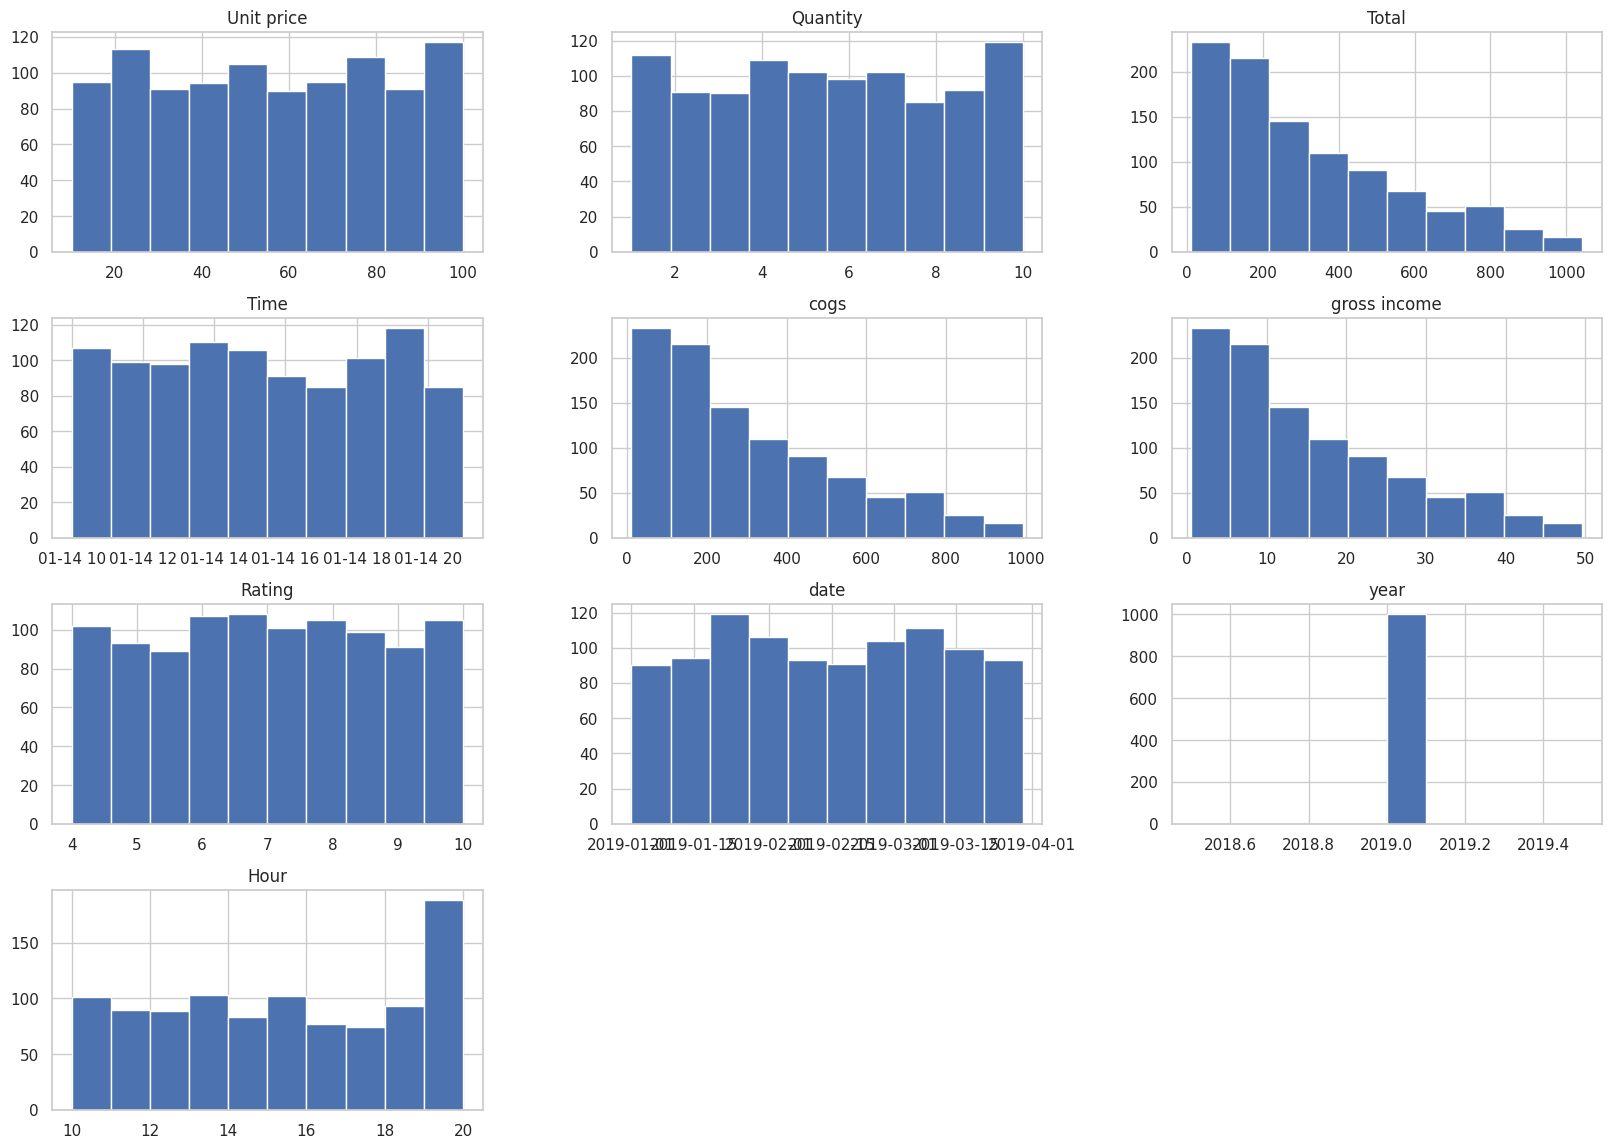

In [197]:
data.hist(figsize=(20,14))
plt.show()

<Axes: >

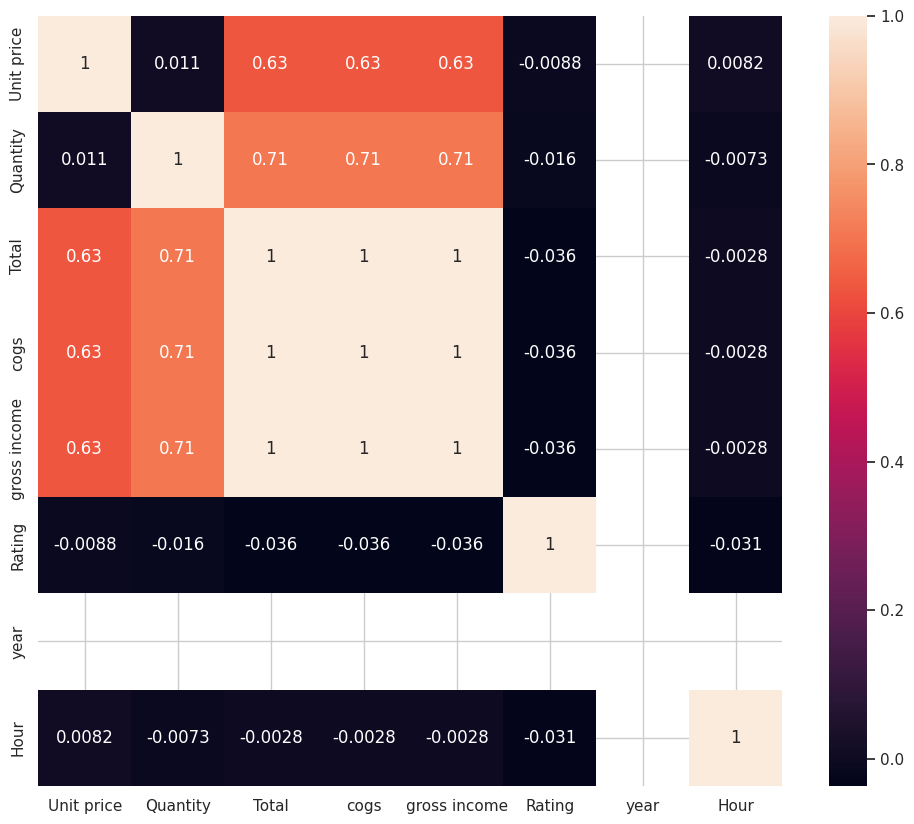

In [198]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

In [199]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross income', 'Rating', 'date', 'month', 'year', 'Hour'],
      dtype='object')

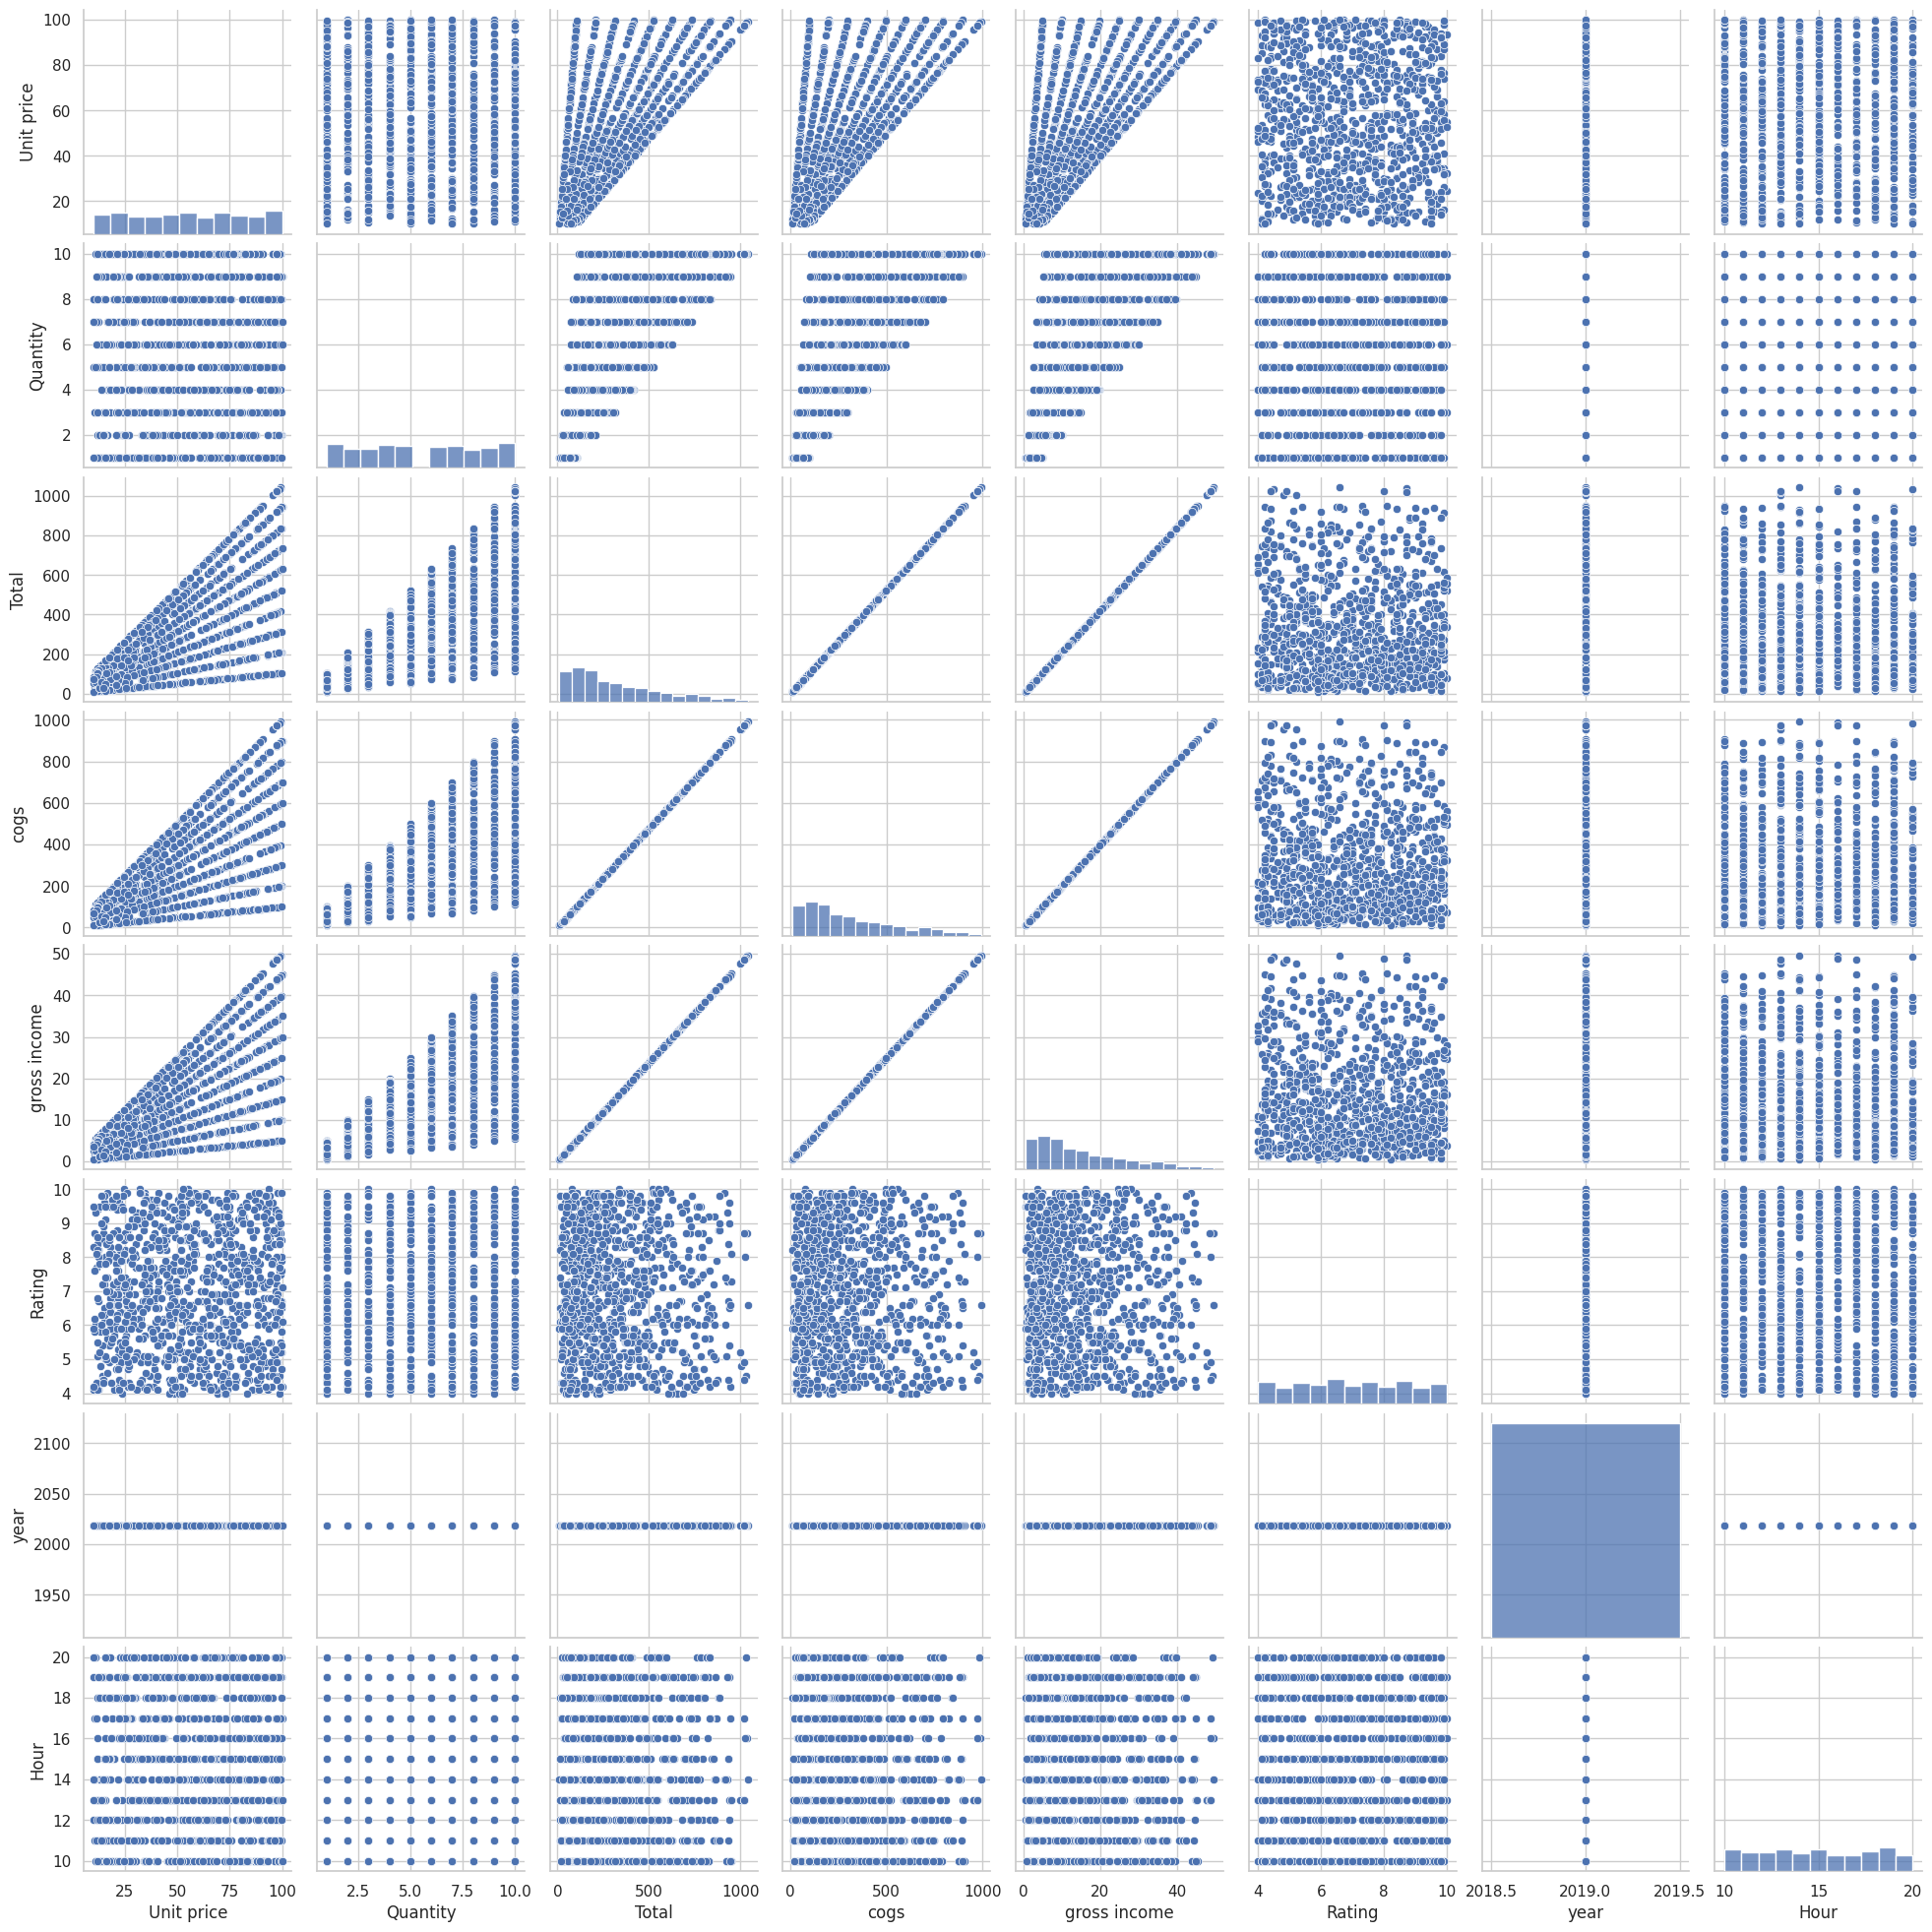

In [200]:
sns.pairplot(data=data)

# QUESTIONS

QUESTION 1.1 => How does the total number of sales of products according to their prices vary by category?

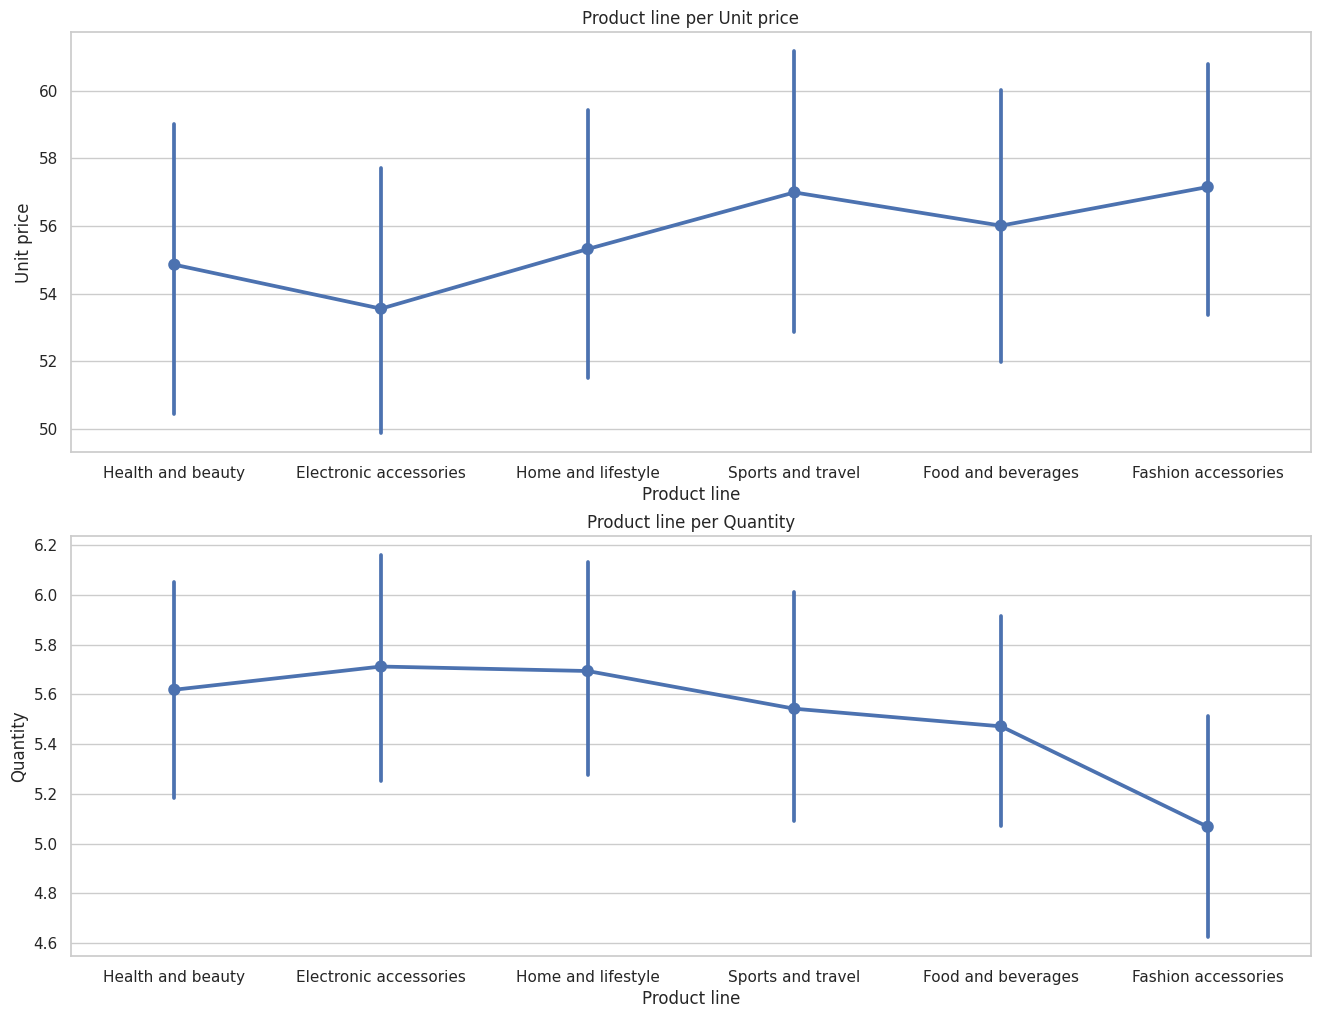

In [201]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 12))

sns.pointplot(x='Product line', y='Unit price', data=data, ax=axes[0])
axes[0].set_title('Product line per Unit price')

sns.pointplot(x='Product line', y='Quantity', data=data, ax=axes[1])
axes[1].set_title('Product line per Quantity')

plt.show()

QUESTION 1.2 => The previous chart showed the effect of the total number of sales according to the prices of the products by category. So, how does this effect vary depending on payment methods ( defined as size=quantity)? Let's examine this change according to January and March.

In [202]:
january_data = data[data['month'] == 'Jan']
february_data = data[data['month'] == 'March']

color_palette = px.colors.qualitative.Set1

fig1 = px.scatter(january_data, x='Product line', y='Unit price', color='Payment', size='Quantity',
               category_orders={"Product line": sorted(january_data['Product line'].unique())},
               width=1000, height=600, color_discrete_sequence=color_palette)

fig2 = px.scatter(february_data, x='Product line', y='Unit price', color='Payment', size='Quantity',
               category_orders={"Product line": sorted(february_data['Product line'].unique())},
               width=1000, height=600, color_discrete_sequence=color_palette)

fig1.update_layout(
    title="Categories by Unit Prices - January",
    xaxis_title="Categories",
    yaxis_title="Unit Price",
    legend_title="Payment Method",
    autosize=False,
)

fig2.update_layout(
    title="Categories by Unit Prices - March",
    xaxis_title="Categories",
    yaxis_title="Unit Price",
    legend_title="Payment Method",
    autosize=False,
)

size_value = 10
fig1.update_yaxes(title_standoff=0)
fig2.update_yaxes(title_standoff=0)

fig1.update_layout(height=1000)
fig2.update_layout(height=1000)

fig1.show()
fig2.show()

QUESTION 2 => How do total sales vary by category and city?

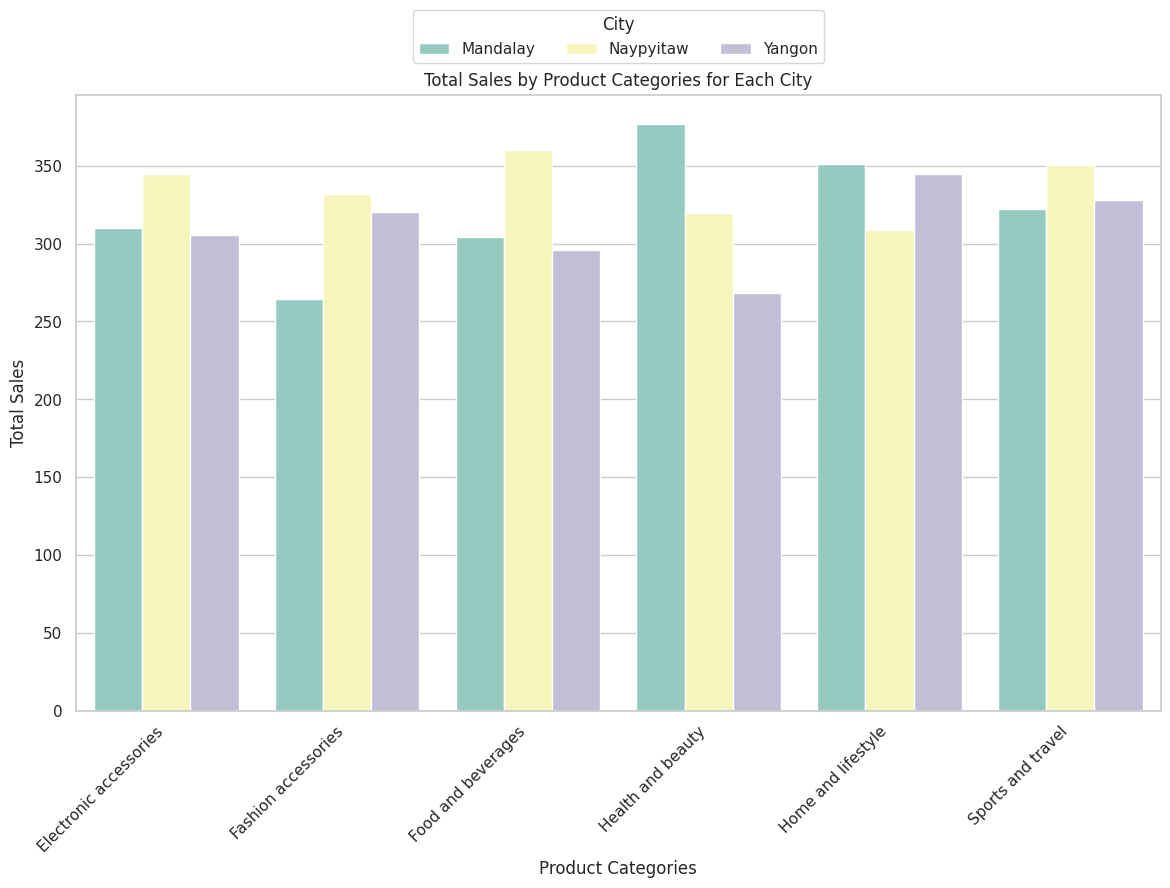

In [203]:
city_product_ratings = data.groupby(['City', 'Product line'])['Total'].mean().reset_index()

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Product line', y='Total', hue='City', data=city_product_ratings, palette='Set3')
plt.title('Total Sales by Product Categories for Each City')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.legend(title='City', bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=3)

plt.show()


QUESTION 3.1 => What is the effect of customer satisfaction on product sales?

In [204]:
color_scale = [[0.0, 'rgb(0, 0, 255)'], [1.0, 'rgb(0, 255, 0)']]

fig = px.scatter(data, x='Rating', y='Total', color='Total',
                 title='Relationship between Customer Satisfaction and Total Sales',
                 labels={'Rating': 'Customer Satisfaction', 'Total': 'Total Sales'},
                 height=600,
                 color_continuous_scale=color_scale)
fig.show()

QUESTION 3.2 => How does this impact vary by city?

In [205]:
fig = px.scatter(data, x='Rating', y='Total', color='City',
                 title='Relationship between Customer Satisfaction and Product Sales (By Cities)',
                 labels={'Rating': 'Customer Satisfaction', 'Total': 'Total Sales'},
                 facet_col='City', facet_col_wrap=3, facet_col_spacing=0.05,
                 height=400, width=900)

fig.show()


QUESTION 4.1 => What are the total sales and unit price values of member and non-member customers based on categories?

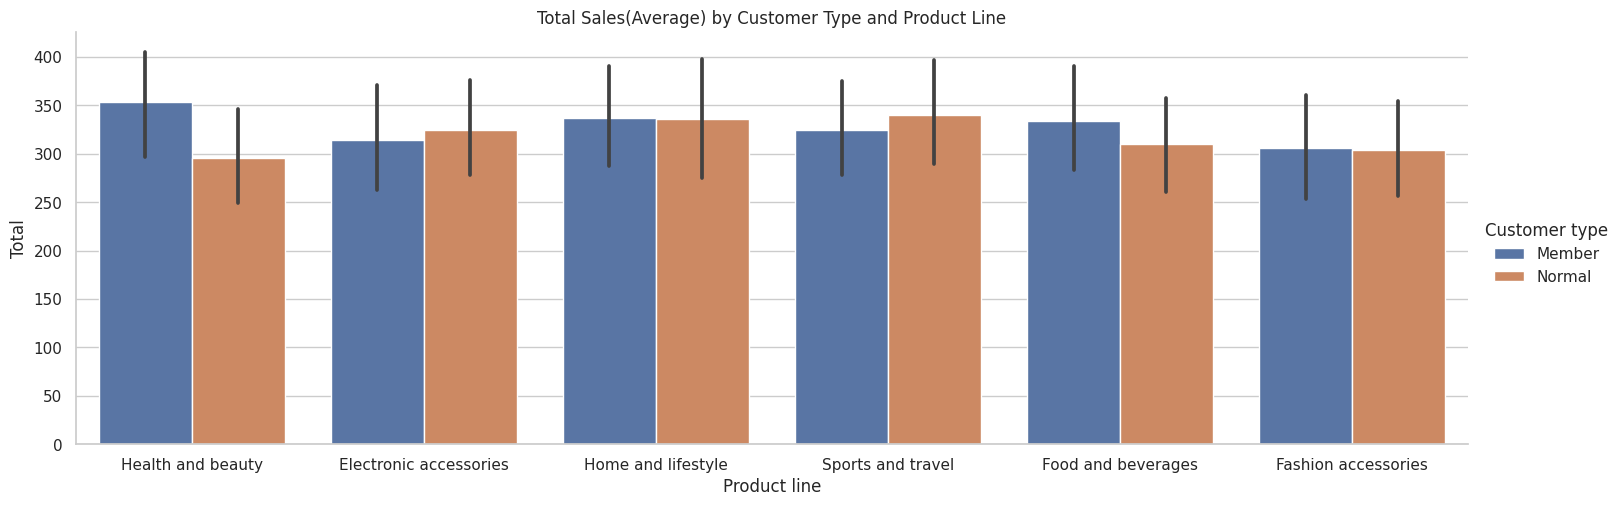

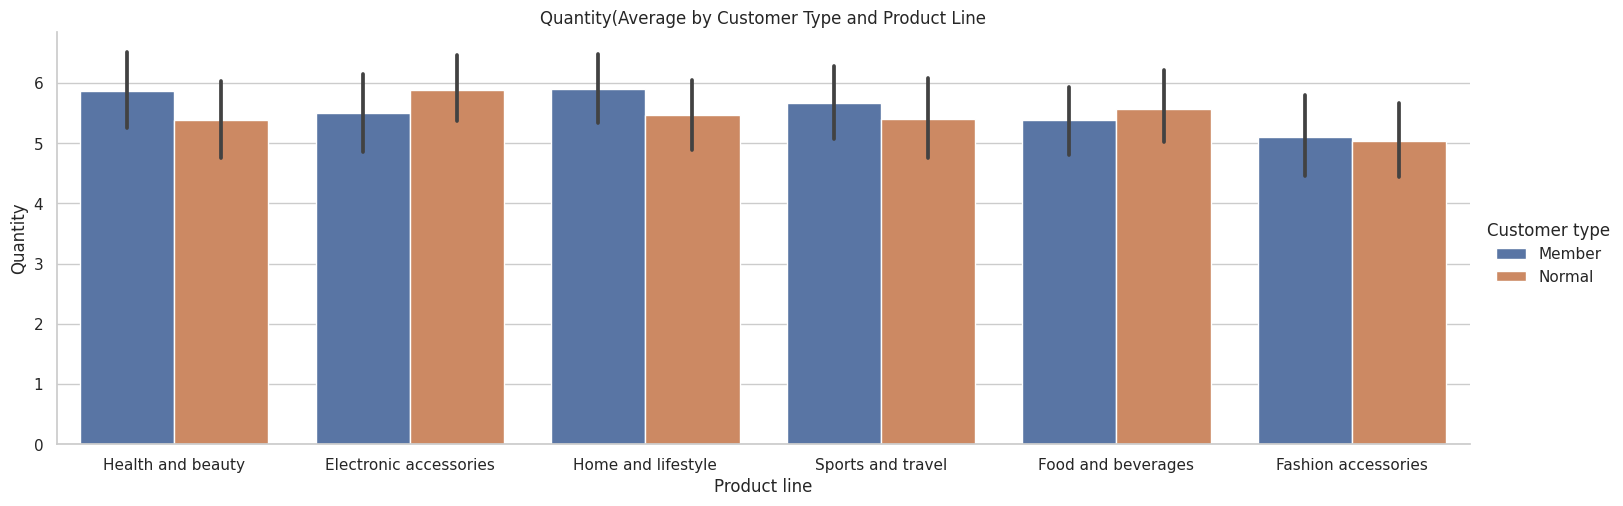

In [206]:
catplot = sns.catplot(x='Product line', y='Total', hue='Customer type', data=data, kind='bar', aspect=3)
plt.title('Total Sales(Average) by Customer Type and Product Line')
plt.show()

catplot = sns.catplot(x='Product line', y='Quantity', hue='Customer type', data=data, kind='bar', aspect=3)
plt.title('Quantity(Average by Customer Type and Product Line')
plt.show()

QUESTION 4.2 => How are the total sales of member and non-member customers divided by category?

In [207]:
member_df = data[data['Customer type'] == 'Member']

fig = px.box(member_df, x='Product line', y='Total', title='Members\' Spending on Product Lines',
             labels={'Product line': 'Product Lines', 'Total': 'Total Sales'})
fig.show()

normal_df = data[data['Customer type'] == 'Normal']
fig = px.box(normal_df, x='Product line', y='Total', title='Non-members\' Spending on Product Lines',
             labels={'Product line': 'Product Lines', 'Total': 'Total Sales'})
fig.show()

QUESTION 5 => How does the sales density vary depending on the days of the week and the hours of those days?

In [208]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time']).dt.time
data['DateTime'] = data['Date'] + pd.to_timedelta(data['Time'].astype(str))
data['Day'] = data['DateTime'].dt.day_name()
data['Hour'] = data['DateTime'].dt.hour

heatmap_data = data.pivot_table(values='Total', index='Day', columns='Hour', aggfunc='sum')

fig = px.imshow(heatmap_data, x=heatmap_data.columns, y=heatmap_data.index, color_continuous_scale='YlGnBu', title='Total Sales for Days and Hours Heatmap')

annotations = []
for i, day in enumerate(heatmap_data.index):
    for j, hour in enumerate(heatmap_data.columns):
        annotations.append(dict(x=hour, y=day, text=f'{heatmap_data.iloc[i, j]:.1f}', showarrow=False))

fig.update_layout(annotations=annotations)
fig.update_layout(xaxis_title='Hour', yaxis_title='Day')

# Set hover text
fig.update_traces(hovertemplate='Day: %{y}<br>Hour: %{x}<br>Total Sales: %{z:.1f}')

fig.show()